In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
owners = pd.read_csv('owners_clean.csv')
companies = pd.read_csv('companies_clean.csv')

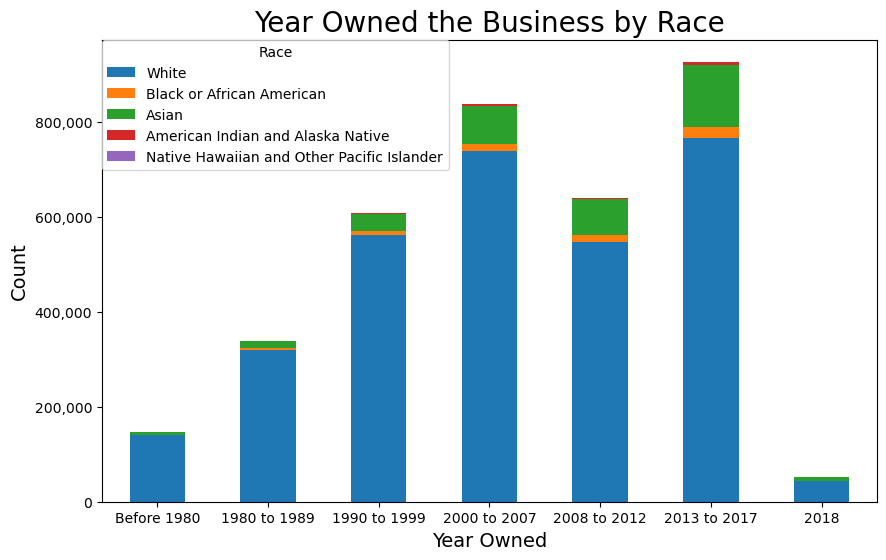

In [84]:
from matplotlib.ticker import FuncFormatter





yr_got_busi = owners[(owners["OWNCHAR_LABEL"]=="2018")|(owners["OWNCHAR_LABEL"]=="2013 to 2017")|(owners["OWNCHAR_LABEL"]=="2008 to 2012")|(owners["OWNCHAR_LABEL"]=="2000 to 2007")|(owners["OWNCHAR_LABEL"]=="1990 to 1999")|(owners["OWNCHAR_LABEL"]=="1980 to 1989")|(owners["OWNCHAR_LABEL"]=="Before 1980")]
filtered_races = ["All owners of respondent firms","Nonminority", "Minority"]
yr_got_busi = yr_got_busi[~yr_got_busi["OWNER_RACE_LABEL"].isin(filtered_races)]

# yr_got_busi = yr_got_busi[["OWNCHAR_LABEL", "OWNER_RACE_LABEL", "OWNPDEMP"]]
yr_got_busi = yr_got_busi.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"]).agg({'OWNPDEMP':'max'})


# yr_got_busi = yr_got_busi.groupby(["OWNPDEMP"]).sum()

# Group and reshape the data
df = yr_got_busi.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNPDEMP"].sum().unstack()

new_index = ["Before 1980", "1980 to 1989", "1990 to 1999", "2000 to 2007", "2008 to 2012", "2013 to 2017", "2018"]
second_index = ["White","Black or African American","Asian","American Indian and Alaska Native","Native Hawaiian and Other Pacific Islander"]
df = df.reindex(new_index)[second_index]

# Plot the chart
ax = df.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add a title and axis labels
plt.title("Year Owned the Business by Race", fontsize=20)
plt.xlabel("Year Owned", size=14)
plt.ylabel("Count", size=14)
plt.xticks(rotation=0)
# Move and rename the legend
legend = ax.legend(title="Race", loc="upper left", borderaxespad=0.)
plt.gca().yaxis.get_major_formatter().set_scientific(False)
def add_commas(x,pos):
    return '{:,}'.format(int(x))
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))



# Show the plot
plt.show()


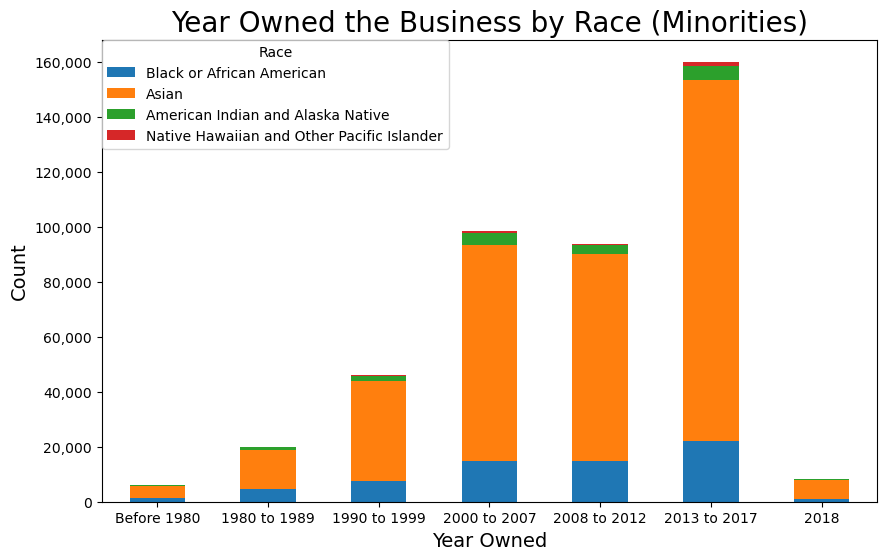

In [85]:
from matplotlib.ticker import FuncFormatter


yr_got_busi = owners[(owners["OWNCHAR_LABEL"]=="2018")|(owners["OWNCHAR_LABEL"]=="2013 to 2017")|(owners["OWNCHAR_LABEL"]=="2008 to 2012")|(owners["OWNCHAR_LABEL"]=="2000 to 2007")|(owners["OWNCHAR_LABEL"]=="1990 to 1999")|(owners["OWNCHAR_LABEL"]=="1980 to 1989")|(owners["OWNCHAR_LABEL"]=="Before 1980")]
filtered_races = ["All owners of respondent firms","Nonminority", "Minority", "White"]
yr_got_busi = yr_got_busi[~yr_got_busi["OWNER_RACE_LABEL"].isin(filtered_races)]

yr_got_busi = yr_got_busi.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"]).agg({'OWNPDEMP':'max'})

# yr_got_busi = yr_got_busi.groupby(["OWNPDEMP"]).sum()

# Group and reshape the data
df = yr_got_busi.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNPDEMP"].sum("OWNPDEMP").unstack()

new_index = ["Before 1980", "1980 to 1989", "1990 to 1999", "2000 to 2007", "2008 to 2012", "2013 to 2017", "2018"]
second_index = ["Black or African American","Asian","American Indian and Alaska Native","Native Hawaiian and Other Pacific Islander"]
df = df.reindex(new_index)[second_index]

# Plot the chart
ax = df.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add a title and axis labels
plt.title("Year Owned the Business by Race (Minorities)", fontsize=20)
plt.xlabel("Year Owned", size=14)
plt.ylabel("Count", size=14)
plt.xticks(rotation=0)
# Move and rename the legend
legend = ax.legend(title="Race", loc="upper left", borderaxespad=0.)
plt.gca().yaxis.get_major_formatter().set_scientific(False)
def add_commas(x,pos):
    return '{:,}'.format(int(x))
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))



# Show the plot
plt.show()

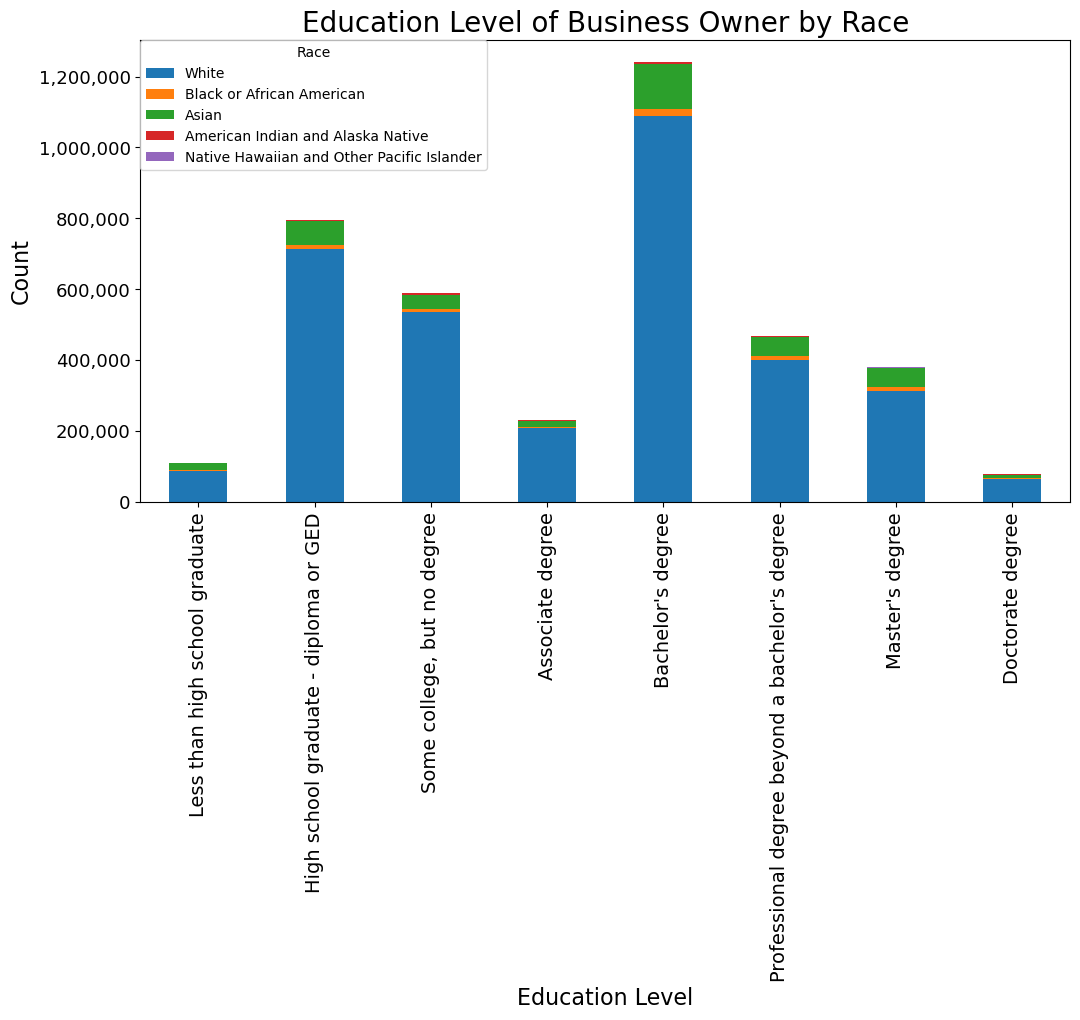

In [103]:
from matplotlib.ticker import FuncFormatter
def add_commas(x,pos):
    return '{:,}'.format(int(x))


edu = owners[(owners["OWNCHAR_LABEL"]=="Bachelor's degree")|(owners["OWNCHAR_LABEL"]=="Some college, but no degree")|(owners["OWNCHAR_LABEL"]=="High school graduate - diploma or GED")|(owners["OWNCHAR_LABEL"]=="Master's degree")|(owners["OWNCHAR_LABEL"]=="Associate degree")|(owners["OWNCHAR_LABEL"]=="Professional degree beyond a bachelor's degree")|(owners["OWNCHAR_LABEL"]=="Less than high school graduate")|(owners["OWNCHAR_LABEL"]=="Doctorate degree")]
filtered_races = ["All owners of respondent firms","Nonminority", "Minority"]
edu = edu[~edu["OWNER_RACE_LABEL"].isin(filtered_races)]

edu = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"]).agg({'OWNPDEMP':'max'})

# Group and reshape the data
# df = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNER_RACE_LABEL"].sum("OWNPDEMP").unstack()
df = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNPDEMP"].sum().unstack()

new_index = ["Less than high school graduate", "High school graduate - diploma or GED", "Some college, but no degree", "Associate degree", "Bachelor's degree", "Professional degree beyond a bachelor's degree", "Master's degree", "Doctorate degree"]
second_index = ["White","Black or African American","Asian","American Indian and Alaska Native","Native Hawaiian and Other Pacific Islander"]
df = df.reindex(new_index)[second_index]

# Plot the chart
ax = df.plot(kind="bar", stacked=True, figsize=(12, 6))

# Add a title and axis labels
plt.title("Education Level of Business Owner by Race", size=20)
plt.xlabel("Education Level", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=13)
# Move and rename the legend
legend = ax.legend(title="Race", loc="upper left", borderaxespad=0.)

plt.gca().yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))


# Show the plot
plt.show()

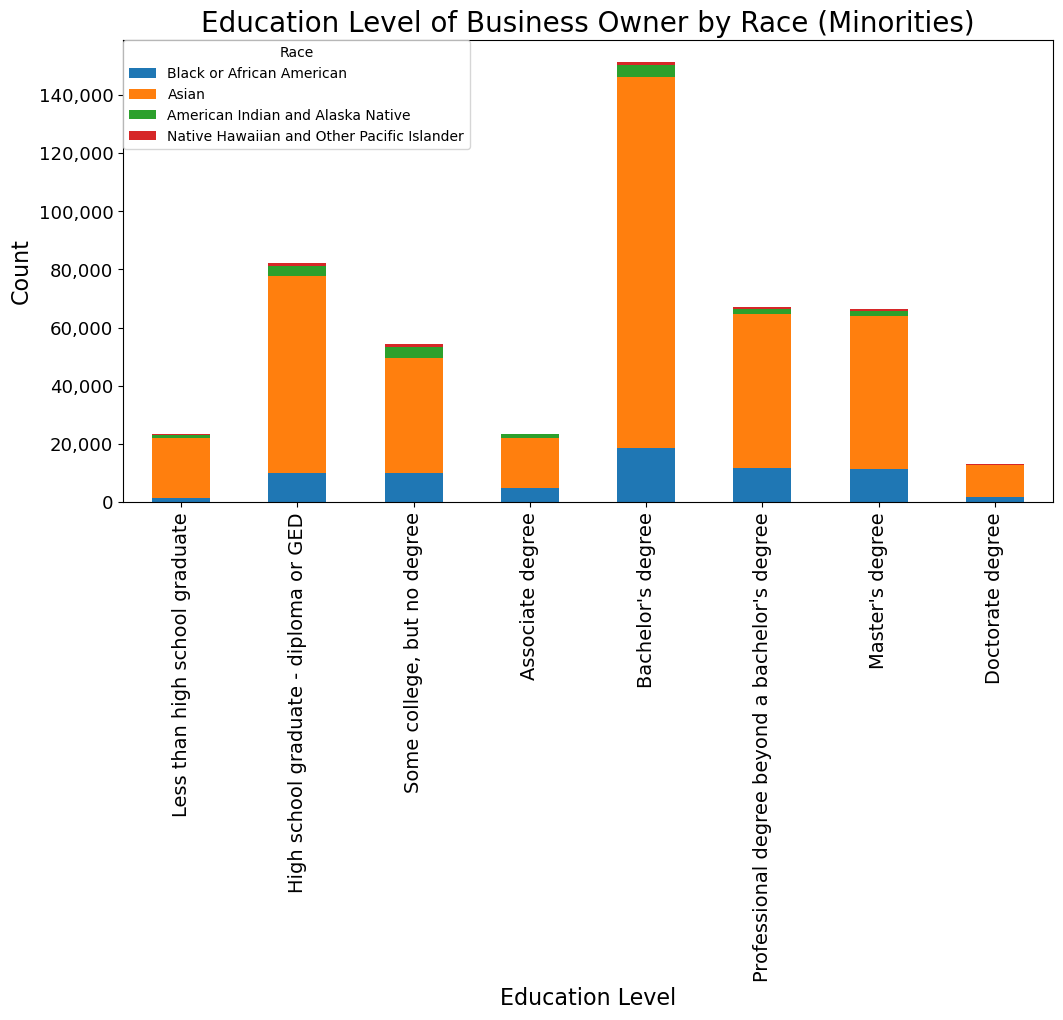

In [104]:
from matplotlib.ticker import FuncFormatter
def add_commas(x,pos):
    return '{:,}'.format(int(x))

edu = owners[(owners["OWNCHAR_LABEL"]=="Bachelor's degree")|(owners["OWNCHAR_LABEL"]=="Some college, but no degree")|(owners["OWNCHAR_LABEL"]=="High school graduate - diploma or GED")|(owners["OWNCHAR_LABEL"]=="Master's degree")|(owners["OWNCHAR_LABEL"]=="Associate degree")|(owners["OWNCHAR_LABEL"]=="Professional degree beyond a bachelor's degree")|(owners["OWNCHAR_LABEL"]=="Less than high school graduate")|(owners["OWNCHAR_LABEL"]=="Doctorate degree")]
filtered_races = ["All owners of respondent firms","Nonminority", "Minority", "White"]
edu = edu[~edu["OWNER_RACE_LABEL"].isin(filtered_races)]

edu = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"]).agg({'OWNPDEMP':'max'})

# Group and reshape the data
# df = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNER_RACE_LABEL"].sum("OWNPDEMP").unstack()
df = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNPDEMP"].sum().unstack()

new_index = ["Less than high school graduate", "High school graduate - diploma or GED", "Some college, but no degree", "Associate degree", "Bachelor's degree", "Professional degree beyond a bachelor's degree", "Master's degree", "Doctorate degree"]
second_index = ["Black or African American","Asian","American Indian and Alaska Native","Native Hawaiian and Other Pacific Islander"]
df = df.reindex(new_index)[second_index]

# Plot the chart
ax = df.plot(kind="bar", stacked=True, figsize=(12, 6))

# Add a title and axis labels
plt.title("Education Level of Business Owner by Race (Minorities)", size=20)
plt.xlabel("Education Level", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=13)
# Move and rename the legend
legend = ax.legend(title="Race", loc="upper left", borderaxespad=0.)

plt.gca().yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))


# Show the plot
plt.show()

In [ ]:
from matplotlib.ticker import FuncFormatter
def add_commas(x,pos):
    return '{:,}'.format(int(x))

edu = owners[(owners["OWNCHAR_LABEL"]=="Bachelor's degree")|(owners["OWNCHAR_LABEL"]=="Some college, but no degree")|(owners["OWNCHAR_LABEL"]=="High school graduate - diploma or GED")|(owners["OWNCHAR_LABEL"]=="Master's degree")|(owners["OWNCHAR_LABEL"]=="Associate degree")|(owners["OWNCHAR_LABEL"]=="Professional degree beyond a bachelor's degree")|(owners["OWNCHAR_LABEL"]=="Less than high school graduate")|(owners["OWNCHAR_LABEL"]=="Doctorate degree")]
filtered_races = ["All owners of respondent firms","Nonminority", "Minority", "White", "Asian"]
edu = edu[~edu["OWNER_RACE_LABEL"].isin(filtered_races)]

edu = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"]).agg({'OWNPDEMP':'max'})

# Group and reshape the data
# df = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNER_RACE_LABEL"].sum("OWNPDEMP").unstack()
df = edu.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNPDEMP"].sum().unstack()

new_index = ["Less than high school graduate", "High school graduate - diploma or GED", "Some college, but no degree", "Associate degree", "Bachelor's degree", "Professional degree beyond a bachelor's degree", "Master's degree", "Doctorate degree"]
second_index = ["Black or African American","Asian","American Indian and Alaska Native","Native Hawaiian and Other Pacific Islander"]
df = df.reindex(new_index)[second_index]

# Plot the chart
ax = df.plot(kind="bar", stacked=True, figsize=(15, 6))

# Add a title and axis labels
plt.title("Education Level of Business Owner by Race (Minorities)", size=20)
plt.xlabel("Education Level", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=90, size=12)
plt.yticks(size=13)
# Move and rename the legend
legend = ax.legend(title="Race", loc="upper left", borderaxespad=0.)

plt.gca().yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))


# Show the plot
plt.show()

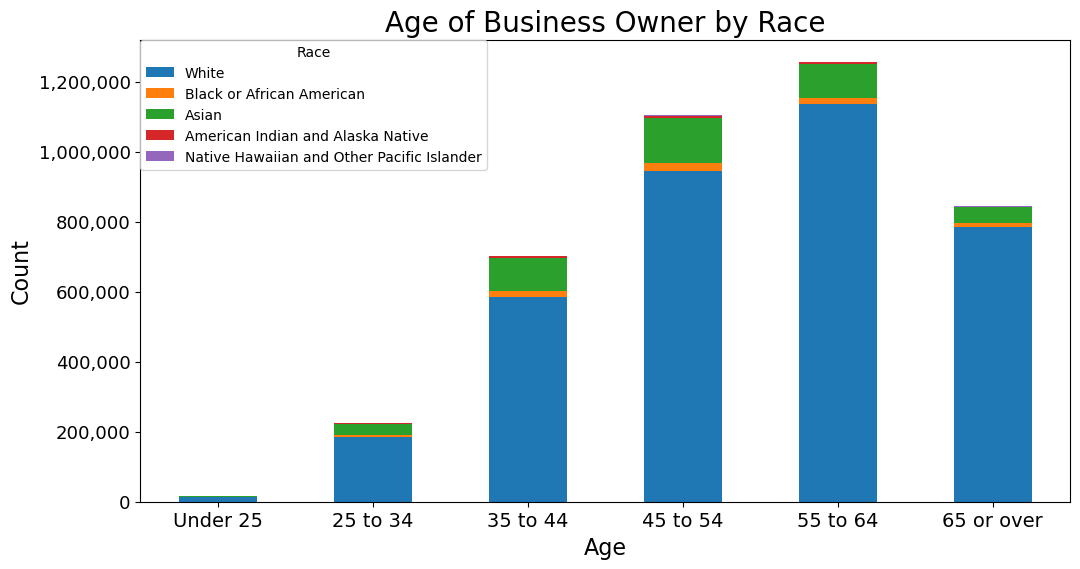

In [89]:
from matplotlib.ticker import FuncFormatter
def add_commas(x,pos):
    return '{:,}'.format(int(x))

age = owners[(owners["OWNCHAR_LABEL"]=="55 to 64")|(owners["OWNCHAR_LABEL"]=="45 to 54")|(owners["OWNCHAR_LABEL"]=="65 or over")|(owners["OWNCHAR_LABEL"]=="35 to 44")|(owners["OWNCHAR_LABEL"]=="25 to 34")|(owners["OWNCHAR_LABEL"]=="Under 25")]

filtered_races = ["All owners of respondent firms","Nonminority", "Minority"]
age = age[~age["OWNER_RACE_LABEL"].isin(filtered_races)]

age = age.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"]).agg({'OWNPDEMP':'max'})
af = af.groupby(["RACE_GROUP_LABEL"]).agg({"FIRMPDEMP":"max"})
# age.groupby("OWNCHAR_LABEL")["OWNER_RACE_LABEL"].value_counts()

# Group and reshape the data
df = age.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNPDEMP"].sum().unstack()

new_index = ["Under 25", "25 to 34", "35 to 44", "45 to 54", "55 to 64", "65 or over"]
second_index = ["White","Black or African American","Asian","American Indian and Alaska Native","Native Hawaiian and Other Pacific Islander"]
df = df.reindex(new_index)[second_index]

# Plot the chart
ax = df.plot(kind="bar", stacked=True, figsize=(12, 6))

# Add a title and axis labels
plt.title("Age of Business Owner by Race", size=20)
plt.xlabel("Age", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=0, size=14)
plt.yticks(size=13)
# Move and rename the legend
legend = ax.legend(title="Race", loc="upper left", borderaxespad=0.)

plt.gca().yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))

# Show the plot
plt.show()

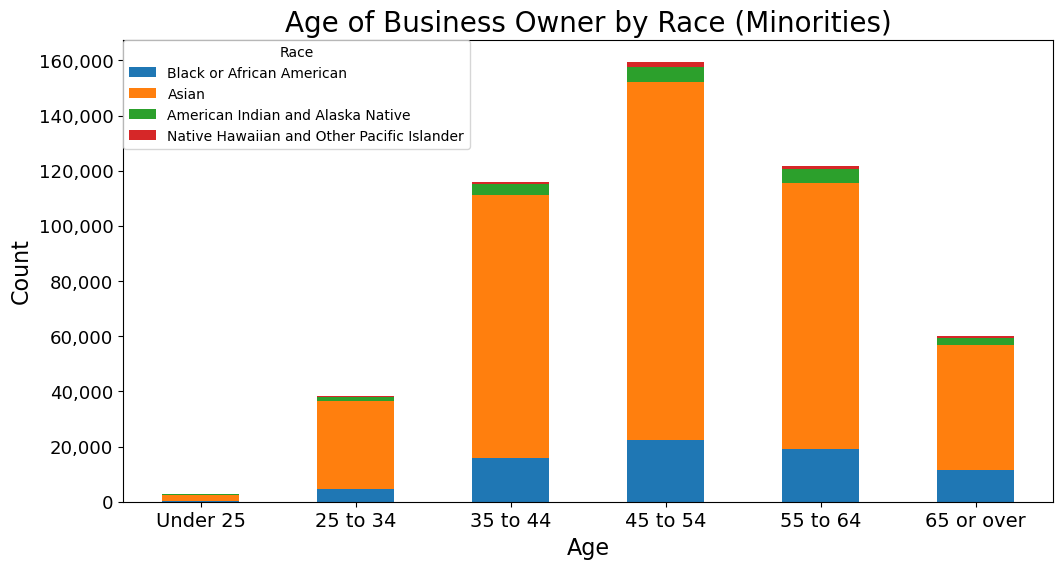

In [90]:
from matplotlib.ticker import FuncFormatter
def add_commas(x,pos):
    return '{:,}'.format(int(x))

age = owners[(owners["OWNCHAR_LABEL"]=="55 to 64")|(owners["OWNCHAR_LABEL"]=="45 to 54")|(owners["OWNCHAR_LABEL"]=="65 or over")|(owners["OWNCHAR_LABEL"]=="35 to 44")|(owners["OWNCHAR_LABEL"]=="25 to 34")|(owners["OWNCHAR_LABEL"]=="Under 25")]

filtered_races = ["All owners of respondent firms","Nonminority", "Minority", "White"]
age = age[~age["OWNER_RACE_LABEL"].isin(filtered_races)]

age = age.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"]).agg({'OWNPDEMP':'max'})

# age.groupby("OWNCHAR_LABEL")["OWNER_RACE_LABEL"].value_counts()

# Group and reshape the data
df = age.groupby(["OWNCHAR_LABEL", "OWNER_RACE_LABEL"])["OWNPDEMP"].sum().unstack()

new_index = ["Under 25", "25 to 34", "35 to 44", "45 to 54", "55 to 64", "65 or over"]
second_index = ["Black or African American","Asian","American Indian and Alaska Native","Native Hawaiian and Other Pacific Islander"]
df = df.reindex(new_index)[second_index]

# Plot the chart
ax = df.plot(kind="bar", stacked=True, figsize=(12, 6))

# Add a title and axis labels
plt.title("Age of Business Owner by Race (Minorities)", size=20)
plt.xlabel("Age", size=16)
plt.ylabel("Count", size=16)
plt.xticks(rotation=0, size=14)
plt.yticks(size=13)
# Move and rename the legend
legend = ax.legend(title="Race", loc="upper left", borderaxespad=0.)

plt.gca().yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(FuncFormatter(add_commas))

# Show the plot
plt.show()